# Digit recognition using convolutional neural networks

The [MNIST dataset](http://yann.lecun.com/exdb/mnist/), officially known as "The MNIST Database of Handwritten Digits," is a famous dataset used to train machine-learning models (and neural networks) to recognize handwritten digits. Each digit in the dataset consists of a 28x28 array of numbers representing pixel values from 0 to 255. In this example, we will use Keras to build and train a convolutional neural network (CNN) on the MNIST dataset. The dataset is included in Keras as a sample dataset, so we'll begin by loading it and examining its content and structure.

![](Images/mnist.png)

In [1]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print('train_images: ' + str(train_images.shape))
print('train_labels: ' + str(train_labels.shape))
print('test_images: ' + str(test_images.shape))
print('test_labels: ' + str(test_labels.shape))

train_images: (60000, 28, 28)
train_labels: (60000,)
test_images: (10000, 28, 28)
test_labels: (10000,)


Plot the first 50 images and show the corresponding labels.

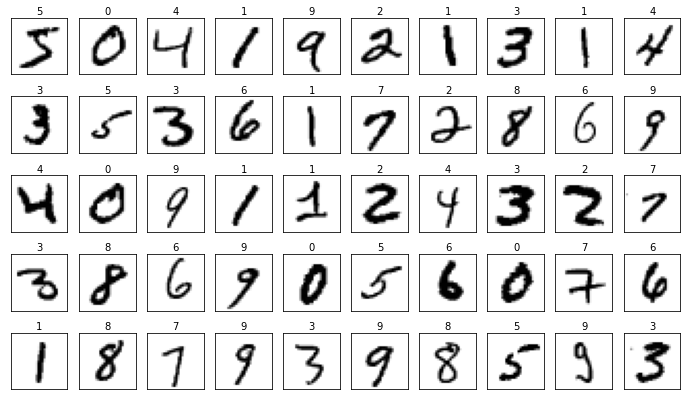

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, axes = plt.subplots(5, 10, figsize=(12, 7), subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(train_images[i], cmap=plt.cm.gray_r)
    ax.text(0.45, 1.05, str(train_labels[i]), transform=ax.transAxes)

Prepare the input data by adding a fourth dimension, normalizing the pixel values by dividing them by 255, and one-hot-encoding the labels 0-9 with Keras's [`to_categorical`](https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical) function.

In [3]:
from keras.utils import to_categorical

x_train = train_images.reshape(60000, 28, 28, 1) / 255
x_test = test_images.reshape(10000, 28, 28, 1) / 255

y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

Create a convolutional neural network with a `softmax` output layer for classification.

In [4]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               204928    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

Call `fit` to train the model.

In [5]:
hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=50)

Epoch 1/10
1200/1200 [==============================] - 11s 9ms/step - loss: 0.1452 - accuracy: 0.9572 - val_loss: 0.0463 - val_accuracy: 0.9846
Epoch 2/10
1200/1200 [==============================] - 11s 9ms/step - loss: 0.0452 - accuracy: 0.9861 - val_loss: 0.0328 - val_accuracy: 0.9887
Epoch 3/10
1200/1200 [==============================] - 11s 9ms/step - loss: 0.0315 - accuracy: 0.9900 - val_loss: 0.0389 - val_accuracy: 0.9863
Epoch 4/10
1200/1200 [==============================] - 11s 9ms/step - loss: 0.0216 - accuracy: 0.9932 - val_loss: 0.0330 - val_accuracy: 0.9883
Epoch 5/10
1200/1200 [==============================] - 11s 9ms/step - loss: 0.0166 - accuracy: 0.9945 - val_loss: 0.0334 - val_accuracy: 0.9898
Epoch 6/10
1200/1200 [==============================] - 11s 9ms/step - loss: 0.0125 - accuracy: 0.9962 - val_loss: 0.0301 - val_accuracy: 0.9912
Epoch 7/10
1200/1200 [==============================] - 11s 9ms/step - loss: 0.0109 - accuracy: 0.9962 - val_loss: 0.0319 - val_ac

Plot the training and validation accuracy over time.

[]

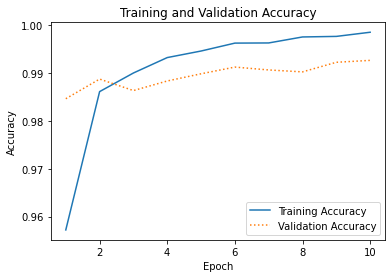

In [6]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training Accuracy')
plt.plot(epochs, val_acc, ':', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

How accurate is the model?

In [7]:
scores = model.evaluate(x_test, y_test, verbose=0)
print('Accuracy: {:.1%}'.format(scores[1]))

Accuracy: 99.3%


Show one of the test images.

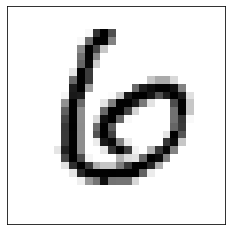

In [8]:
test_image = test_images[11]
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
plt.imshow(test_image, cmap=plt.cm.gray_r)

Use the test image to make a prediction.

In [9]:
x = test_image.reshape(1, 28, 28, 1) / 255
model.predict(x)

array([[1.22489909e-14, 1.07161465e-18, 1.26064668e-22, 1.10633546e-19,
        1.06000656e-19, 2.72452755e-14, 1.00000000e+00, 1.47909384e-23,
        1.24649545e-13, 5.68731920e-23]], dtype=float32)

Get the predicted class.

In [10]:
import numpy as np

predicted_class = np.argmax(model.predict(x), axis=-1)[0]
print('Looks like a ' + str(predicted_class) + '!')

Looks like a 6!
